<a href="https://colab.research.google.com/github/IDeal7/ML/blob/master/teststudent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


170500096/170498071 [==============================] - 11s 0us/step
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 41s 821us/step - loss: 2.2000 - accuracy: 0.1589 - val_loss: 2.1530 - val_accuracy: 0.2223
Epoch 2/50
50000/50000 [==============================] - 28s 560us/step - loss: 1.6796 - accuracy: 0.3697 - val_loss: 1.9386 - val_accuracy: 0.2561
Epoch 3/50
50000/50000 [==============================] - 28s 560us/step - loss: 1.4352 - accuracy: 0.4679 - val_loss: 1.7021 - val_accuracy: 0.3906
Epoch 4/50
50000/50000 [==============================] - 28s 561us/step - loss: 1.2474 - accuracy: 0.5456 - val_loss: 1.7946 - val_accuracy: 0.3537
Epoch 5/50
50000/50000 [==============================] - 28s 560us/step - loss: 1.0941 - accuracy: 0.6049 - val_loss: 1.5361 - val_accuracy: 0.4328
Epoch 6/50
50000/50000 [==============================] - 28s 561us/step - loss: 0.9693 - accuracy: 0.6550 - val_loss: 1.4455 - val_accur

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


50000/50000 [==============================] - 12s 248us/step - loss: 2.3014 - accuracy: 0.2826
Epoch 3/5
50000/50000 [==============================] - 12s 248us/step - loss: 2.3009 - accuracy: 0.3369
Epoch 4/5
50000/50000 [==============================] - 12s 249us/step - loss: 2.3006 - accuracy: 0.3906
Epoch 5/5
50000/50000 [==============================] - 12s 247us/step - loss: 2.3003 - accuracy: 0.4335
student1 Test loss: 2.223291577529907
student1 Test accuracy: 0.41359999775886536
Epoch 1/5
50000/50000 [==============================] - 13s 251us/step - loss: 2.2643 - accuracy: 0.3233
Epoch 2/5
50000/50000 [==============================] - 12s 248us/step - loss: 1.3516 - accuracy: 0.5227
Epoch 3/5
50000/50000 [==============================] - 12s 249us/step - loss: 1.1891 - accuracy: 0.5833
Epoch 4/5
50000/50000 [==============================] - 12s 249us/step - loss: 1.0893 - accuracy: 0.6201
Epoch 5/5
50000/50000 [==============================] - 12s 250us/step - loss: 

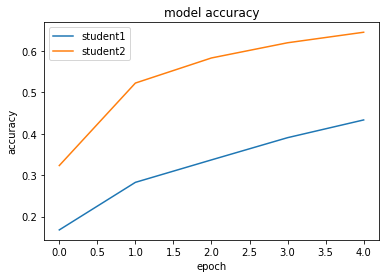

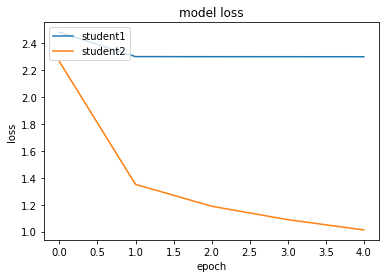

'\nhist_x = np.arange(len(hist_list))\nx_label = ["teacher loss","teacher acc", "student1 loss","student1 acc", "student2 loss","student2 acc"]\nplt.bar(hist_x, hist_list)\nplt.xticks(hist_x, x_label)\nplt.xlabel("score")\nplt.show()\n'

In [2]:
from keras.datasets import mnist, fashion_mnist, cifar100, cifar10
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical
import keras.backend as K
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras import activations
from keras import utils

np.random.seed(0)

img_rows = 32
img_cols = 32
channels = 3
T = 2.0  # T-value

def softer_softmax(x, axis=-1):
    ndim = K.ndim(x)
    if ndim == 1:
        raise ValueError('Cannot apply softmax to a tensor that is 1D')
    elif ndim == 2:
        return K.softmax(x/T)
    elif ndim > 2:
        e = K.exp(x - K.max(x, axis=axis, keepdims=True))
        s = K.sum(e, axis=axis, keepdims=True)
        return e / s
    else:
        raise ValueError('Cannot apply softmax to a tensor that is 1D. '
                         'Received input: %s' % x)


result_list = []
num_classes = 10
input_shape = (img_rows, img_cols, channels)
earlystopping = EarlyStopping(monitor="val_loss", patience=3)

def pred2softmax(x):
    y = []

    for i in range(len(x)):
        exp_x = []  # 분자
        for j in range(len(x[0])):
            exp_x.append(np.exp(x[i][j]/T))
        sum_exp_x = np.sum(exp_x)  # 분모
        y.append(exp_x/sum_exp_x)  # 분자.분모
    y = np.array(y)
    return y

def teacher_model():

    (x_train, y_train), (x_test, y_test) = cifar10.load_data()


    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
    model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
    model.add(Conv2D(512, (3, 3), activation="relu", padding="same"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation="softmax"))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    hist = model.fit(x_train, y_train,
                     batch_size=512,
                     epochs=50,
                     verbose=1,
                     validation_data=(x_test, y_test),
                     callbacks=[earlystopping])

    model.save("cifar10_teacher.h5")

teacher_model()


# distilled model
def student_model1():

    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

#    index = np.where(y_train == 1)  # 라벨이 1인것들은 모두 삭제
#    index2 = np.where(y_test == 1)

#    x_train = np.delete(x_train, index, axis=0)
#    y_train = np.delete(y_train, index, axis=0)

    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)

    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation=softer_softmax))

    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

    teacher_model = load_model("cifar10_teacher.h5")  # 기존의 y대신 teacher 모델로 뽑은 soft label 사용
    soft_pred = teacher_model.predict(x_train)
    print(soft_pred[0])
    soft_labels = pred2softmax(soft_pred)
    print(soft_labels[0])

    hist1 = model.fit(x_train, soft_labels,
              epochs=5,
              batch_size=512,
              verbose=1,
              callbacks=[earlystopping])

    model.save("cifar10_student1.h5")

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print('student1 Test loss:', test_loss)
    print('student1 Test accuracy:', test_acc)

    return hist1
hist1 = student_model1()


def student_model2():

    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

#    index = np.where(y_train == 1)  # 라벨이 1인것들은 모두 삭제
#    index2 = np.where(y_test == 1)

#    x_train = np.delete(x_train, index, axis=0)
#    y_train = np.delete(y_train, index, axis=0)

    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)

    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)


    model = Sequential()
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dense(num_classes, activation="softmax"))

    model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])


    hist2 = model.fit(x_train, y_train,
              epochs=5,
              batch_size=512,
              verbose=1,
              callbacks=[earlystopping])

    model.save("cifar10_student2.h5")

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print("student2 Test loss:", test_loss)
    print('student2 Test accuracy:', test_acc)

    return hist2
hist2 = student_model2()

plt.plot(hist1.history['accuracy'])
plt.plot(hist2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['student1', 'student2'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(hist1.history['loss'])
plt.plot(hist2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['student1', 'student2'], loc='upper left')
plt.show()

#print(result_list)
'''
hist_x = np.arange(len(hist_list))
x_label = ["teacher loss","teacher acc", "student1 loss","student1 acc", "student2 loss","student2 acc"]
plt.bar(hist_x, hist_list)
plt.xticks(hist_x, x_label)
plt.xlabel("score")
plt.show()
'''